<a href="https://colab.research.google.com/github/FGalvao77/Machine-Learning-para-Manutencao-Preditiva-Industrial/blob/main/Machine_Learning_para_Manuten%C3%A7%C3%A3o_Preditiva_Industrial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

## **`Machine Learning` para _Manutenção Preditiva Industrial_**
---
---

Endereço dos conjuntos de dados:

- https://github.com/FGalvao77/datasets/tree/main/industrial%20machine%20data

In [ ]:
# importando os conjuntos de dados para o ambiente
!curl https://raw.githubusercontent.com/FGalvao77/datasets/main/industrial%20machine%20data/train_data.csv >> train.csv
!curl https://raw.githubusercontent.com/FGalvao77/datasets/main/industrial%20machine%20data/test_data.csv >> test.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  371k  100  371k    0     0  1330k      0 --:--:-- --:--:-- --:--:-- 1330k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  182k  100  182k    0     0   983k      0 --:--:-- --:--:-- --:--:--  983k


In [ ]:
# visualizando as pastas/arquivos presente no diretório principal
%ls

sample_data/  test.csv  train.csv


In [ ]:
# visualizando as primeiras observações do conjunto de dados de treino
!head train.csv

ID Produto,Qualidade,Temperatura ar [K],Temperatura processo [K],Velocidade rotação [rpm],Torque [Nm],Desgaste [min],Falha,Tipo falha
B57099,Baixa,298.5,308.8,1305.0,58.7,26.0,0.0,Sem falha
B50640,Baixa,301.5,310.3,1415.0,41.6,28.0,0.0,Sem falha
B55178,Baixa,300.9,312.1,1359.0,51.7,146.0,0.0,Sem falha
B51337,Baixa,302.0,310.5,1263.0,60.6,90.0,1.0,Superaquecimento
B56278,Baixa,297.3,308.1,1468.0,49.8,0.0,0.0,Sem falha
B55081,Baixa,300.8,312.4,1365.0,44.5,129.0,0.0,Sem falha
A33987,Alta,302.8,311.0,1436.0,43.5,47.0,0.0,Sem falha
B50548,Baixa,301.5,310.8,1350.0,58.5,13.0,0.0,Sem falha
A30096,Alta,297.8,309.0,1410.0,48.8,23.0,0.0,Sem falha


In [ ]:
# visualizando as primeiras observações do conjunto de dados de teste
!head test.csv

ID Produto,Qualidade,Temperatura ar [K],Temperatura processo [K],Velocidade rotação [rpm],Torque [Nm],Desgaste [min],Falha,Tipo falha
M18884,Média,302.1,311.0,1351.0,60.3,207.0,1.0,Sobrecarga
B47496,Baixa,297.8,308.4,1714.0,33.2,177.0,0.0,Sem falha
A34357,Alta,303.6,312.6,1436.0,42.0,110.0,0.0,Sem falha
M15953,Média,296.8,307.5,1443.0,39.2,13.0,0.0,Sem falha
M24334,Média,298.7,309.6,1455.0,46.8,162.0,0.0,Sem falha
B48211,Baixa,296.4,307.5,1549.0,36.1,58.0,0.0,Sem falha
B50454,Baixa,301.3,310.0,1665.0,31.4,0.0,0.0,Sem falha
M19352,Média,302.6,310.5,1420.0,56.4,57.0,0.0,Sem falha
B54520,Baixa,299.7,310.3,1386.0,46.6,2.0,0.0,Sem falha


In [ ]:
# importando as bibliotecas inicias
import pandas as pd     # manipulação e análise de dados
import numpy as np      # recursos matématicos
import warnings         # ignorar mensagens de alertas

# utilizando a biblioteca "warnings" para filtar ignorar mensagens de alertas
warnings.filterwarnings('ignore')

In [ ]:
# instanciando os conjuntos de dados: train = df_train & test = def_test
df_train = pd.read_csv(filepath_or_buffer='train.csv')
df_test = pd.read_csv(filepath_or_buffer='test.csv')

In [ ]:
# visualizando a dimensões dos objetos: linhas e colunas
df_train.shape, df_test.shape   

((6681, 9), (3292, 9))

In [ ]:
# visualizando as 5 primeiras observações do conjunto de dados de treino
df_train.head()

,ID Produto,Qualidade,Temperatura ar [K],Temperatura processo [K],Velocidade rotação [rpm],Torque [Nm],Desgaste [min],Falha,Tipo falha
0,B57099,Baixa,298.5,308.8,1305.0,58.7,26.0,0.0,Sem falha
1,B50640,Baixa,301.5,310.3,1415.0,41.6,28.0,0.0,Sem falha
2,B55178,Baixa,300.9,312.1,1359.0,51.7,146.0,0.0,Sem falha
3,B51337,Baixa,302.0,310.5,1263.0,60.6,90.0,1.0,Superaquecimento
4,B56278,Baixa,297.3,308.1,1468.0,49.8,0.0,0.0,Sem falha


In [ ]:
# visualizando as 5 primeiras observações do conjunto de dados de teste
df_test.head()

,ID Produto,Qualidade,Temperatura ar [K],Temperatura processo [K],Velocidade rotação [rpm],Torque [Nm],Desgaste [min],Falha,Tipo falha
0,M18884,Média,302.1,311.0,1351.0,60.3,207.0,1.0,Sobrecarga
1,B47496,Baixa,297.8,308.4,1714.0,33.2,177.0,0.0,Sem falha
2,A34357,Alta,303.6,312.6,1436.0,42.0,110.0,0.0,Sem falha
3,M15953,Média,296.8,307.5,1443.0,39.2,13.0,0.0,Sem falha
4,M24334,Média,298.7,309.6,1455.0,46.8,162.0,0.0,Sem falha


In [ ]:
# informações gerais do conjunto de dados de treino
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6681 entries, 0 to 6680
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID Produto                6681 non-null   object 
 1   Qualidade                 6681 non-null   object 
 2   Temperatura ar [K]        6681 non-null   float64
 3   Temperatura processo [K]  6681 non-null   float64
 4   Velocidade rotação [rpm]  6681 non-null   float64
 5   Torque [Nm]               6681 non-null   float64
 6   Desgaste [min]            6681 non-null   float64
 7   Falha                     6681 non-null   float64
 8   Tipo falha                6681 non-null   object 
dtypes: float64(6), object(3)
memory usage: 469.9+ KB


In [ ]:
# informações gerais do conjunto de dados de teste
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3292 entries, 0 to 3291
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID Produto                3292 non-null   object 
 1   Qualidade                 3292 non-null   object 
 2   Temperatura ar [K]        3292 non-null   float64
 3   Temperatura processo [K]  3292 non-null   float64
 4   Velocidade rotação [rpm]  3292 non-null   float64
 5   Torque [Nm]               3292 non-null   float64
 6   Desgaste [min]            3292 non-null   float64
 7   Falha                     3292 non-null   float64
 8   Tipo falha                3292 non-null   object 
dtypes: float64(6), object(3)
memory usage: 231.6+ KB


In [ ]:
# realizando a concatenação dos objetos "df_train" e "df_test" 
# em um novo objeto chamado "df"
df = pd.concat(
    objs=[df_train, df_test],
    axis=0,
    ignore_index=True
)

# visualizando a dimensão do novo objeto - linhas e colunas
df.shape

(9973, 9)

In [ ]:
# visualizando as 5 últimas observações
df.tail()

,ID Produto,Qualidade,Temperatura ar [K],Temperatura processo [K],Velocidade rotação [rpm],Torque [Nm],Desgaste [min],Falha,Tipo falha
9968,M18668,Média,302.3,310.9,1762.0,24.5,73.0,0.0,Sem falha
9969,B50561,Baixa,301.3,310.6,1376.0,47.6,45.0,0.0,Sem falha
9970,B56826,Baixa,299.4,310.4,1582.0,31.7,181.0,0.0,Sem falha
9971,B55634,Baixa,298.6,310.0,1522.0,40.3,32.0,0.0,Sem falha
9972,M23195,Média,299.0,309.8,2240.0,15.9,144.0,0.0,Sem falha


In [ ]:
# informações gerais 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9973 entries, 0 to 9972
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID Produto                9973 non-null   object 
 1   Qualidade                 9973 non-null   object 
 2   Temperatura ar [K]        9973 non-null   float64
 3   Temperatura processo [K]  9973 non-null   float64
 4   Velocidade rotação [rpm]  9973 non-null   float64
 5   Torque [Nm]               9973 non-null   float64
 6   Desgaste [min]            9973 non-null   float64
 7   Falha                     9973 non-null   float64
 8   Tipo falha                9973 non-null   object 
dtypes: float64(6), object(3)
memory usage: 701.4+ KB


In [ ]:
# contabilizando a distribuição das observações presente na coluna "Falha"
df['Falha'].value_counts()

0.0    9643
1.0     330
Name: Falha, dtype: int64

In [ ]:
# contabilizando valores nulos
df.isnull().sum()

ID Produto                  0
Qualidade                   0
Temperatura ar [K]          0
Temperatura processo [K]    0
Velocidade rotação [rpm]    0
Torque [Nm]                 0
Desgaste [min]              0
Falha                       0
Tipo falha                  0
dtype: int64

In [ ]:
# verificando se há presença de observações duplicadas
df.duplicated().sum().any()     # True (verdadeiro) & False (falso)

False

In [ ]:
# estatística descritiva
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperatura ar [K],9973.0,300.003259,2.000548,295.3,298.3,300.1,301.5,304.5
Temperatura processo [K],9973.0,310.004031,1.483692,305.7,308.8,310.1,311.1,313.8
Velocidade rotação [rpm],9973.0,1538.893212,179.412171,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],9973.0,39.978993,9.966805,3.8,33.2,40.1,46.7,76.6
Desgaste [min],9973.0,107.921087,63.649152,0.0,53.0,108.0,162.0,253.0
Falha,9973.0,0.033089,0.178879,0.0,0.0,0.0,0.0,1.0


In [ ]:
# visualizando o tipo de dado em cada atributo
df.dtypes

ID Produto                   object
Qualidade                    object
Temperatura ar [K]          float64
Temperatura processo [K]    float64
Velocidade rotação [rpm]    float64
Torque [Nm]                 float64
Desgaste [min]              float64
Falha                       float64
Tipo falha                   object
dtype: object

In [ ]:
# importando bibliotecas para visualização gráfica
import matplotlib.pyplot as plt
import seaborn as sns

# importando função para definir o tamanho da visualização
from pylab import rcParams

# definindo algumas configurações do ambiente para visualização
%matplotlib inline
plt.style.use('fivethirtyeight')
# plt.style.use('ggplot')
# sns.set()
rcParams['figure.figsize'] = 10, 3

In [ ]:
# realizando uma cópia do conjunto de dados
df_eda = df.copy()

In [ ]:
# contabilizando a proporcão (%) da ocorrência de falha: sim (1) & não (0)
failures = round(df_eda['Falha'].value_counts(normalize=True) * 100, 4)

# visualizando o resultado
failures

0.0    96.6911
1.0     3.3089
Name: Falha, dtype: float64

In [ ]:
failures[0], failures[1]

(96.6911, 3.3089)

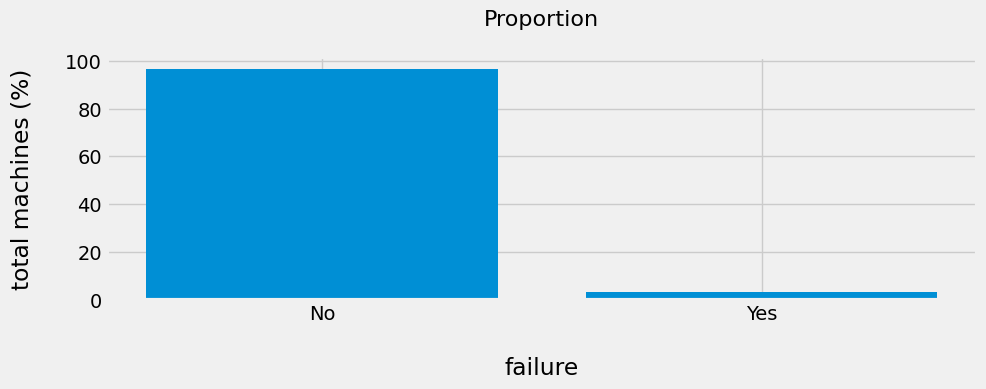

In [ ]:
# plotando o gráfico de barras para visualizar a proporção das 
# observações presente na coluna "Falha"
plt.bar(
    x=failures.index, 
    height=failures
)

plt.xticks(
    ticks=[0, 1],
    labels=['No', 'Yes']
)
plt.xlabel('\nfailure')
plt.ylabel('total machines (%)\n')
plt.title(label='Proportion\n', size=16);

In [ ]:
# contabilizando a proporcionalidade (%) da ocorrência sim (1) ou não (0) de falfa
no_fail = df_eda.loc[df_eda['Falha'] == 0]
yes_fail = df_eda.loc[df_eda['Falha'] == 1]

# contabilizando a quantidade final
len(no_fail), len(yes_fail)

(9643, 330)

In [ ]:
# contabilizando a proporcão (%) da ocorrência de tipos de falhas
type_faults = round(yes_fail['Tipo falha'].value_counts(normalize=True) * 100, 4)

# visualizando o resultado
type_faults

Superaquecimento      33.9394
Falha por potência    28.7879
Sobrecarga            23.6364
Desgaste              13.6364
Name: Tipo falha, dtype: float64

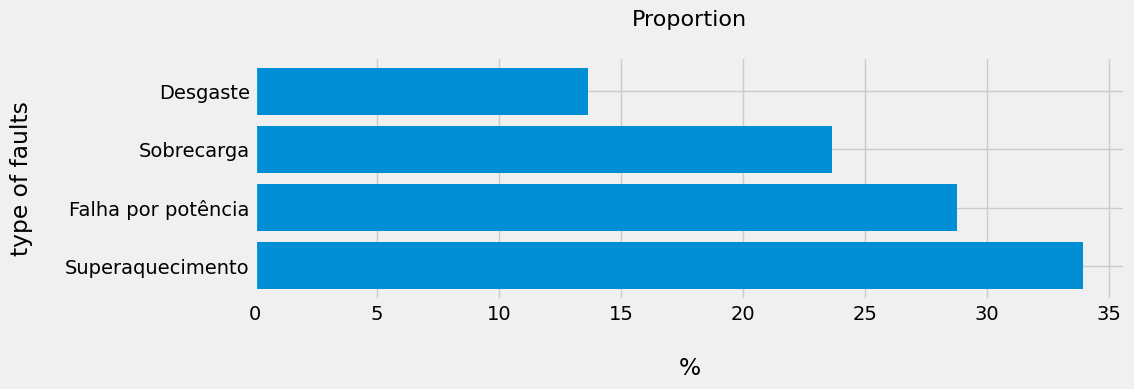

In [ ]:
# plotando o gráfico de barras para visualizar a proporção das 
# de tipos de falhas
plt.barh(
    y=type_faults.index,
    width=type_faults
)

plt.xlabel('\n%')
plt.ylabel('type of faults\n')
plt.title(label='Proportion\n', size=16);

In [ ]:
# distribuição da qualidade em relação a falha: 
# contagem, soma, média e desvio-padrão
quality_failure = df_eda.groupby(by='Qualidade')['Falha']\
    .agg(['count', 'sum', 'mean', 'std'])

quality_failure

,count,sum,mean,std
Qualidade,,,,
Alta,998,20.0,0.020040,0.140208
Baixa,5984,231.0,0.038603,0.192663
Média,2991,79.0,0.026413,0.160386


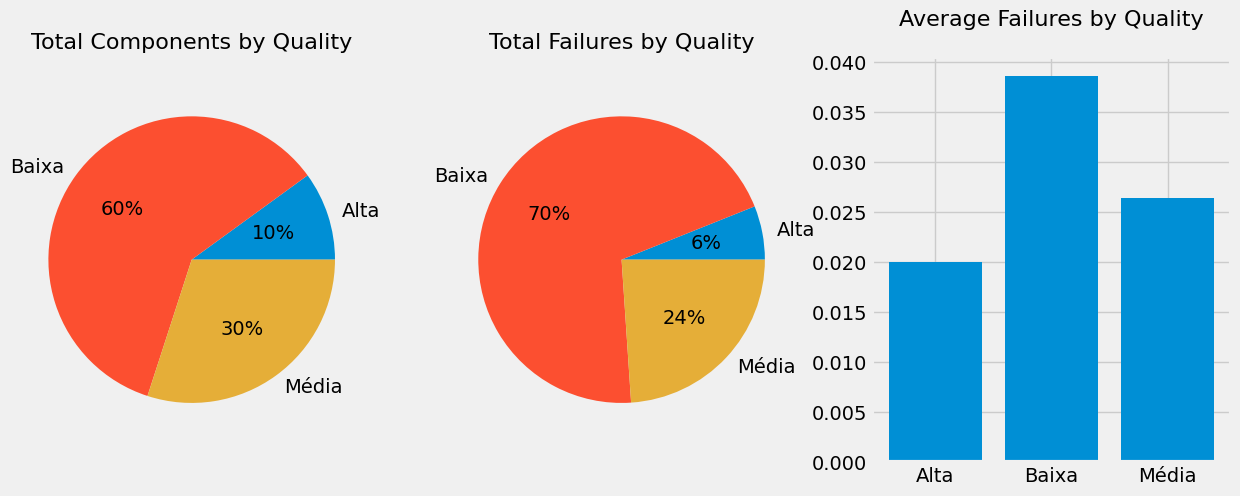

In [ ]:
# plotando o gráfico de torta e de barras para visualizar a 
# distribuição da qualidade em relação a falha
ax = plt.figure(figsize=(14, 5))

ax = plt.subplot(1, 3, 1)
ax = plt.pie(
    x=quality_failure['count'],
    labels=quality_failure.index,
    autopct='%.0f%%'
)
plt.title('Total Components by Quality\n', size=16)


ax = plt.subplot(1, 3, 2)
ax = plt.pie(
    x=quality_failure['sum'],
    labels=quality_failure.index,
    autopct='%.0f%%'
)
plt.title('Total Failures by Quality\n', size=16)


ax = plt.subplot(1, 3, 3)
ax = plt.bar(
    x=quality_failure.index,
    height=quality_failure['mean']
)
plt.title('Average Failures by Quality\n', size=16);

In [ ]:
# visualizando a correlação entre as variáveis
correlation = df_eda.corr()

correlation

,Temperatura ar [K],Temperatura processo [K],Velocidade rotação [rpm],Torque [Nm],Desgaste [min],Falha
Temperatura ar [K],1.000000,0.876068,0.023332,-0.014553,0.014370,0.083066
Temperatura processo [K],0.876068,1.000000,0.020200,-0.015275,0.013970,0.035997
Velocidade rotação [rpm],0.023332,0.020200,1.000000,-0.875069,-0.000110,-0.044042
Torque [Nm],-0.014553,-0.015275,-0.875069,1.000000,-0.002552,0.193420
Desgaste [min],0.014370,0.013970,-0.000110,-0.002552,1.000000,0.106337
Falha,0.083066,0.035997,-0.044042,0.193420,0.106337,1.000000


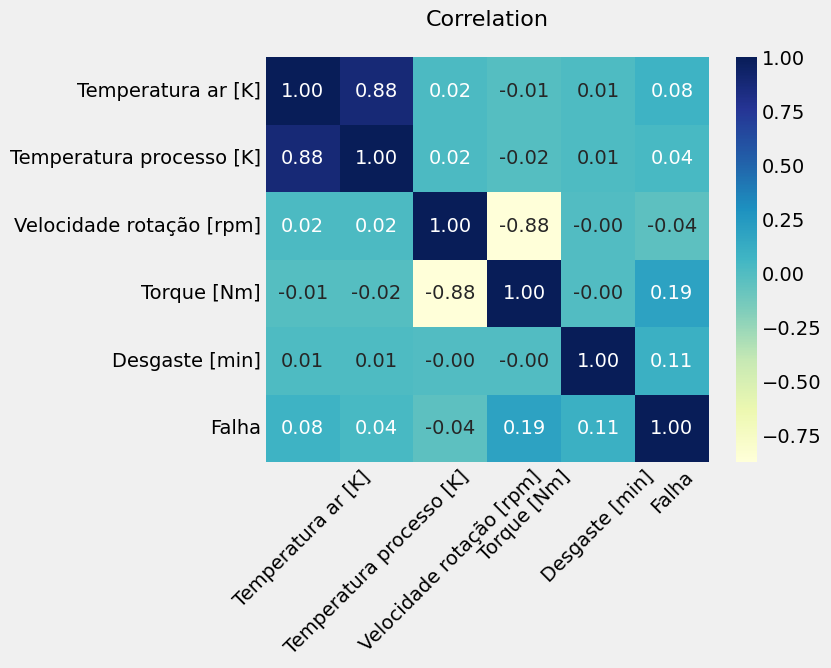

In [ ]:
# plotando gráfico de calor da correlação entre as variáveis
ax = plt.figure(figsize=(14, 5))

ax = plt.subplot(1, 2, 1)
ax = sns.heatmap(
    data=correlation, 
    annot=True,
    fmt='.2f',
    cmap='YlGnBu'
)

plt.xticks(rotation=45)
plt.title('Correlation\n', size=16);

In [ ]:
# visualizando o nome dos atributos
df_eda.columns

Index(['ID Produto', 'Qualidade', 'Temperatura ar [K]',
       'Temperatura processo [K]', 'Velocidade rotação [rpm]', 'Torque [Nm]',
       'Desgaste [min]', 'Falha', 'Tipo falha'],
      dtype='object')

In [ ]:
# instanciando uma seleção dos atributos de interesse
df_temp = df_eda[
    ['Temperatura ar [K]', 'Temperatura processo [K]', 'Falha']
]

In [ ]:
# criando um nova coluna da variação da temperatura chamada "var_temperatura" 
# com o resultado das colunas "Temperatura processo [K]" - "Temperatura ar [K]"
df_temp['var_temperatura'] =\
     df_temp['Temperatura processo [K]'] - df_temp['Temperatura ar [K]']

In [ ]:
# separando há ocorrençia de falha ou não
df_temp_noFail = df_temp[df_temp['Falha'] == 0]     # naõ
df_temp_yesFail = df_temp[df_temp['Falha'] == 1]    # sim

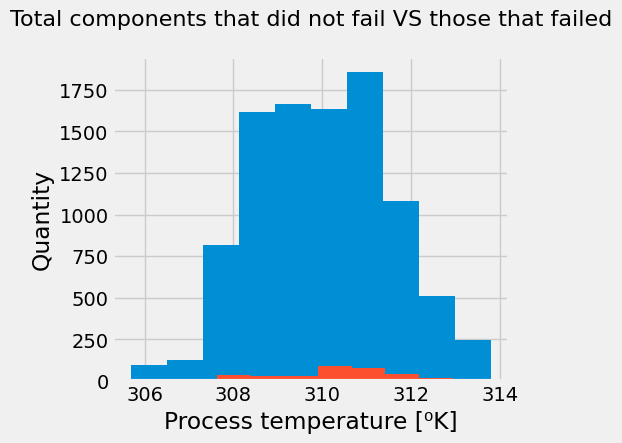

In [ ]:
# realizando a plotagem do gráfico de barras
# "Temperatura processo [K]" por ocorrência ou não de falha
ax  = plt.figure(figsize=(10, 4))

ax = plt.subplot(1, 2, 1)
ax = plt.hist(
    x=df_temp_noFail['Temperatura processo [K]']
)

ax = plt.subplot(1, 2, 1)
ax = plt.hist(
    x=df_temp_yesFail['Temperatura processo [K]']
)
plt.xlabel('Process temperature [⁰K]')
plt.ylabel('Quantity')

plt.title('Total components that did not fail VS those that failed\n', 
          size=16);

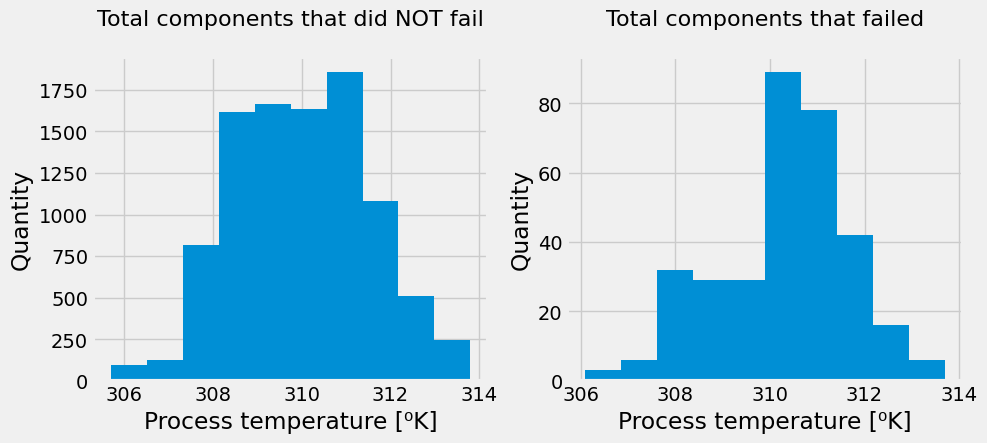

In [ ]:
# separando em dois gráficos distintos
# "Temperatura processo [K]" por ocorrência ou não de falha
ax  = plt.figure(figsize=(10, 4))

ax = plt.subplot(1, 2, 1)
ax = plt.hist(
    x=df_temp_noFail['Temperatura processo [K]']
)
plt.xlabel('Process temperature [⁰K]')
plt.ylabel('Quantity')
plt.title('Total components that did NOT fail\n', size=16)

ax = plt.subplot(1, 2, 2)
ax = plt.hist(
    x=df_temp_yesFail['Temperatura processo [K]']
)
plt.xlabel('Process temperature [⁰K]')
plt.ylabel('Quantity')
plt.title('Total components that failed\n', size=16);

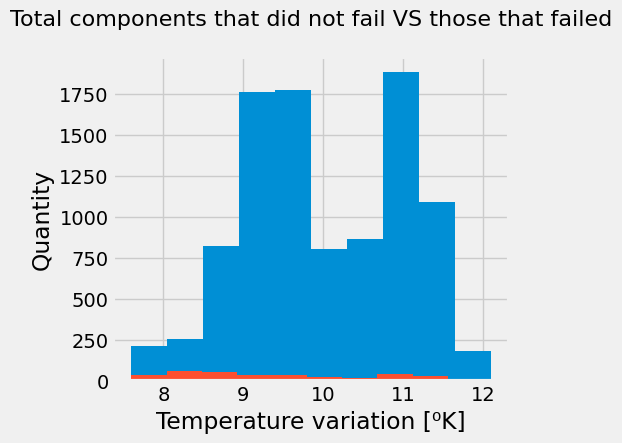

In [ ]:
# realizando a plotagem do gráfico de barras
# "var_temperatura" por ocorrência ou não de falha
ax  = plt.figure(figsize=(10, 4))

ax = plt.subplot(1, 2, 1)
ax = plt.hist(
    x=df_temp_noFail['var_temperatura']
)

ax = plt.subplot(1, 2, 1)
ax = plt.hist(
    x=df_temp_yesFail['var_temperatura']
)

plt.xlabel('Temperature variation [⁰K]')
plt.ylabel('Quantity')
plt.title('Total components that did not fail VS those that failed\n', 
          size=16);

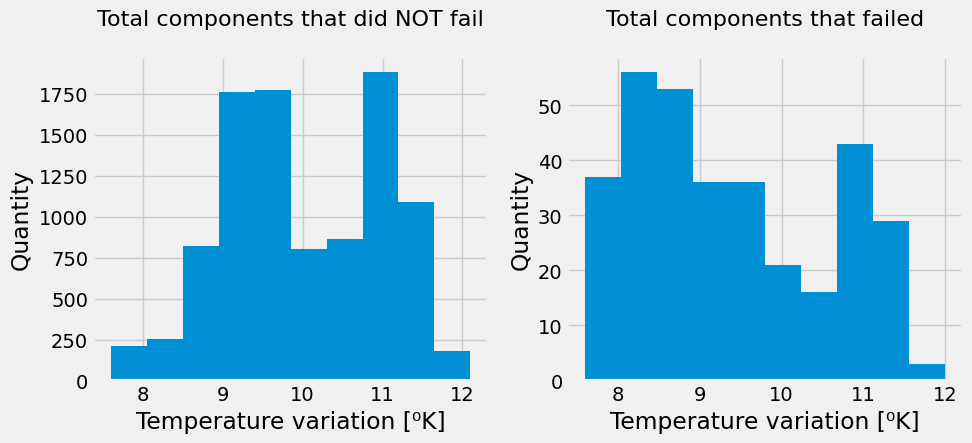

In [ ]:
# separando em dois gráficos distintos
# "var_temperatura" por ocorrência ou não de falha
ax  = plt.figure(figsize=(10, 4))

ax = plt.subplot(1, 2, 1)
ax = plt.hist(
    x=df_temp_noFail['var_temperatura']
)
plt.xlabel('Temperature variation [⁰K]')
plt.ylabel('Quantity')
plt.title('Total components that did NOT fail\n', size=16)

ax = plt.subplot(1, 2, 2)
ax = plt.hist(
    x=df_temp_yesFail['var_temperatura']
)
plt.xlabel('Temperature variation [⁰K]')
plt.ylabel('Quantity')
plt.title('Total components that failed\n', size=16);

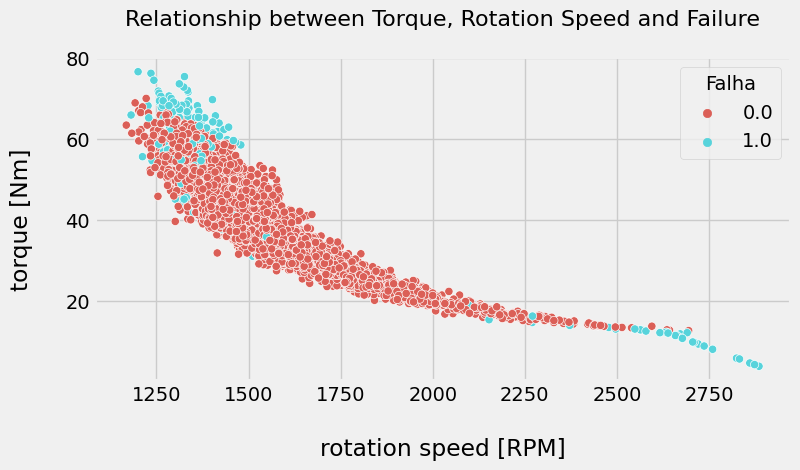

In [ ]:
# plotando gráfico de dispersão da relação entre
# torque [Nm], velocidade da rotação [rpm] e falha
plt.figure(figsize=(8,4))

sns.scatterplot(
    x='Velocidade rotação [rpm]', 
    y='Torque [Nm]', 
    palette='hls', 
    hue='Falha', 
    data=df_eda);

plt.xlabel('\nrotation speed [RPM]')
plt.ylabel('torque [Nm]\n')
plt.title('Relationship between Torque, Rotation Speed ​​and Failure\n', 
          size=16);

In [ ]:
# criando no conjunto de dados de treino a coluna "'var_temperatura"
# do resultado das colunas: "Temperatura processo [K]" - "Temperatura ar [K]"
df_train['var_temperatura'] =\
     df_train['Temperatura processo [K]'] - df_train['Temperatura ar [K]']

In [ ]:
# visualizando as primeiras observações do conjunto de dados de treino
df_train.head()

,ID Produto,Qualidade,Temperatura ar [K],Temperatura processo [K],Velocidade rotação [rpm],Torque [Nm],Desgaste [min],Falha,Tipo falha,var_temperatura
0,B57099,Baixa,298.5,308.8,1305.0,58.7,26.0,0.0,Sem falha,10.3
1,B50640,Baixa,301.5,310.3,1415.0,41.6,28.0,0.0,Sem falha,8.8
2,B55178,Baixa,300.9,312.1,1359.0,51.7,146.0,0.0,Sem falha,11.2
3,B51337,Baixa,302.0,310.5,1263.0,60.6,90.0,1.0,Superaquecimento,8.5
4,B56278,Baixa,297.3,308.1,1468.0,49.8,0.0,0.0,Sem falha,10.8


In [ ]:
# realizando o "dummy" com o tipo de observações presente na coluna "Qualidade"
dummy_train = pd.get_dummies(
    data=df_train['Qualidade']
)

In [ ]:
# visualizando as primeiras observações do objeto "dummy_trian"
dummy_train.head()

,Alta,Baixa,Média
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [ ]:
# função para otimizar o processo de tratamento/limpeza do conjunto de dados
def pipeline(df: object):
    df['var_temperatura'] =\
         df['Temperatura processo [K]'] - df['Temperatura ar [K]']

    dummy = pd.get_dummies(data=df['Qualidade'])
    df = pd.concat(
        objs=[df.drop('Qualidade', axis=1), dummy],
        axis=1
    )

    return df

In [ ]:
# aplicando a função no conjunto de dados de treino
df_train = pipeline(df=df_train)

In [ ]:
# visualizando as primeiras observações
df_train.head()

,ID Produto,Temperatura ar [K],Temperatura processo [K],Velocidade rotação [rpm],Torque [Nm],Desgaste [min],Falha,Tipo falha,var_temperatura,Alta,Baixa,Média
0,B57099,298.5,308.8,1305.0,58.7,26.0,0.0,Sem falha,10.3,0,1,0
1,B50640,301.5,310.3,1415.0,41.6,28.0,0.0,Sem falha,8.8,0,1,0
2,B55178,300.9,312.1,1359.0,51.7,146.0,0.0,Sem falha,11.2,0,1,0
3,B51337,302.0,310.5,1263.0,60.6,90.0,1.0,Superaquecimento,8.5,0,1,0
4,B56278,297.3,308.1,1468.0,49.8,0.0,0.0,Sem falha,10.8,0,1,0


In [ ]:
# aplicando a função no conjunto de dados de teste
df_test = pipeline(df=df_test)

In [ ]:
# visualizando as primeiras observações
df_test.head()

,ID Produto,Temperatura ar [K],Temperatura processo [K],Velocidade rotação [rpm],Torque [Nm],Desgaste [min],Falha,Tipo falha,var_temperatura,Alta,Baixa,Média
0,M18884,302.1,311.0,1351.0,60.3,207.0,1.0,Sobrecarga,8.9,0,0,1
1,B47496,297.8,308.4,1714.0,33.2,177.0,0.0,Sem falha,10.6,0,1,0
2,A34357,303.6,312.6,1436.0,42.0,110.0,0.0,Sem falha,9.0,1,0,0
3,M15953,296.8,307.5,1443.0,39.2,13.0,0.0,Sem falha,10.7,0,0,1
4,M24334,298.7,309.6,1455.0,46.8,162.0,0.0,Sem falha,10.9,0,0,1


In [ ]:
# eliminando as colunas sem relevância para aplicação dos modelos
cols_drop = ['ID Produto', 'Tipo falha', 'Falha']

In [ ]:
# instanciando os dados das variávies independentes (X) e a dependente (y)
# separando em cada uma e uma parte para treino e teste 
# eliminando as colunas presente no objeto "cols_drop"
X_train = df_train.drop(columns=cols_drop)      
X_test = df_test.drop(columns=cols_drop)

 # definindo como variável dependente as dados da coluna "Tipo Falha"
y_train = df_train['Tipo falha']   
y_test = df_test['Tipo falha']

In [ ]:
# contabilizando a quantidade de dados em cada partição
len(X_train), len(X_test), len(y_train), len(y_test)

(6681, 3292, 6681, 3292)

In [ ]:
# visualizando os dados de entrada do treino
X_train[:5]

,Temperatura ar [K],Temperatura processo [K],Velocidade rotação [rpm],Torque [Nm],Desgaste [min],var_temperatura,Alta,Baixa,Média
0,298.5,308.8,1305.0,58.7,26.0,10.3,0,1,0
1,301.5,310.3,1415.0,41.6,28.0,8.8,0,1,0
2,300.9,312.1,1359.0,51.7,146.0,11.2,0,1,0
3,302.0,310.5,1263.0,60.6,90.0,8.5,0,1,0
4,297.3,308.1,1468.0,49.8,0.0,10.8,0,1,0


In [ ]:
# visualizando os dados de saída do treino
y_train[:5]

0           Sem falha
1           Sem falha
2           Sem falha
3    Superaquecimento
4           Sem falha
Name: Tipo falha, dtype: object

In [ ]:
# impportando as funções para aplicação dos modelos de classificação
from sklearn.linear_model import LogisticRegression     # regressão logística
from sklearn.tree import DecisionTreeClassifier         # árvore de decisão
from sklearn.ensemble import RandomForestClassifier     # floresta aleatória
from sklearn.neighbors import KNeighborsClassifier      # k-vizinhos 
from sklearn.naive_bayes import GaussianNB              # gaussiano de naive bayes

# métricas de avaliação dos modelos: pontuação da acurácia do roc e matriz de confusão
from sklearn.metrics import roc_auc_score, confusion_matrix

In [ ]:
# instanciando o modelo de regressão logística
logReg_model = LogisticRegression(class_weight='balanced', 
                                 random_state=1522, 
                                 n_jobs=-1)

logReg_model

LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=1522)

In [ ]:
# treinando o modelo
logReg_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=1522)

In [ ]:
# com os dados de teste realizando as predições com o modelo após seu treinamento
y_pred_logReg = logReg_model.predict(X_test)

y_pred_logReg

array(['Sobrecarga', 'Sem falha', 'Sem falha', ..., 'Sem falha',
       'Sem falha', 'Sem falha'], dtype=object)

In [ ]:
# calculando a distribuição das probabilidades
y_proba_logReg = logReg_model.predict_proba(X_test)

y_proba_logReg

array([[3.79800736e-02, 1.01100079e-02, 4.41885870e-03, 9.25497803e-01,
        2.19932571e-02],
       [1.24121281e-02, 9.17318828e-03, 9.77805913e-01, 4.23204607e-04,
        1.85566046e-04],
       [1.18816203e-09, 4.57714043e-04, 6.76138484e-01, 5.95262636e-09,
        3.23403794e-01],
       ...,
       [1.84796692e-02, 1.04372679e-04, 9.73684449e-01, 8.73431258e-04,
        6.85807839e-03],
       [7.91445440e-17, 6.02261635e-03, 9.72763717e-01, 1.42286111e-15,
        2.12136668e-02],
       [6.53545525e-06, 1.59808500e-01, 8.40184964e-01, 9.94966020e-10,
        1.82033674e-10]])

In [ ]:
# visualizando o resultado da pontuação da acurácia do roc
roc_score_logReg = roc_auc_score(
    y_true=y_test,
    y_score=y_proba_logReg,
    multi_class='ovo',
    average='weighted'
)

roc_score_logReg

0.9606712074946099

In [ ]:
# visualizando a matriz de confusão
cm_logReg = confusion_matrix(
    y_true=y_test,
    y_pred=y_pred_logReg
)

cm_logReg

array([[  12,    0,    0,    4,    0],
       [   1,   22,    1,    3,    0],
       [ 205,   85, 2430,   53,  415],
       [   0,    1,    0,   21,    2],
       [   0,    1,    0,    2,   34]])

In [ ]:
# instanciando os rótulos das observações
labels = logReg_model.classes_

labels

array(['Desgaste', 'Falha por potência', 'Sem falha', 'Sobrecarga',
       'Superaquecimento'], dtype=object)

In [ ]:
# colors = sns.color_palette()

# colors

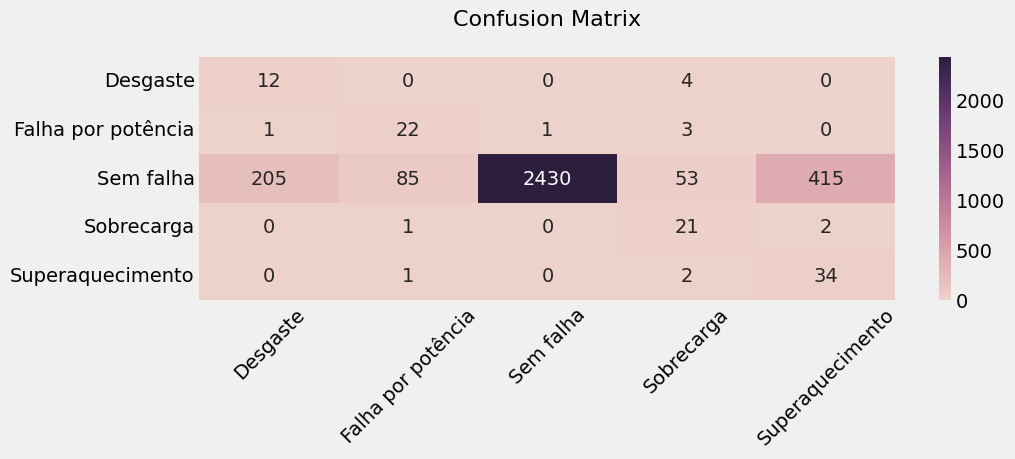

In [ ]:
# plotando o gráfico da matriz de confusão do modelo
sns.heatmap(
    data=cm_logReg, 
    annot=True,
    fmt='.0f',
    cmap=sns.cubehelix_palette(as_cmap=True), 
    xticklabels=labels,
    yticklabels=labels
)

plt.xticks(rotation=45)
plt.title('Confusion Matrix\n', size=16);

In [ ]:
# instanciando o modelo de árvore de decisão
decTree_model = DecisionTreeClassifier(
    random_state=1522,
    class_weight='balanced'
)

decTree_model

DecisionTreeClassifier(class_weight='balanced', random_state=1522)

In [ ]:
# treinando o modelo
decTree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1522)

In [ ]:
# com os dados de teste realizando as predições com o modelo após seu treinamento
y_pred_decTree = decTree_model.predict(X_test)

y_pred_decTree

array(['Sem falha', 'Sem falha', 'Sem falha', ..., 'Sem falha',
       'Sem falha', 'Sem falha'], dtype=object)

In [ ]:
# calculando a distribuição das probabilidades
y_proba_decTree = decTree_model.predict_proba(X_test)

y_proba_decTree

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [ ]:
# visualizando o resultado da pontuação da acurácia do roc
roc_score_decTree = roc_auc_score(
    y_true=y_test,
    y_score=y_proba_decTree,
    multi_class='ovo',
    average='weighted'
)

roc_score_decTree

0.7954047144326996

In [ ]:
# visualizando a matriz de confusão
cm_decTree = confusion_matrix(
    y_true=y_test,
    y_pred=y_pred_decTree
)

cm_decTree

array([[   0,    0,   15,    1,    0],
       [   0,   17,    7,    2,    1],
       [   8,    1, 3173,    4,    2],
       [   0,    0,    5,   19,    0],
       [   0,    0,    5,    0,   32]])

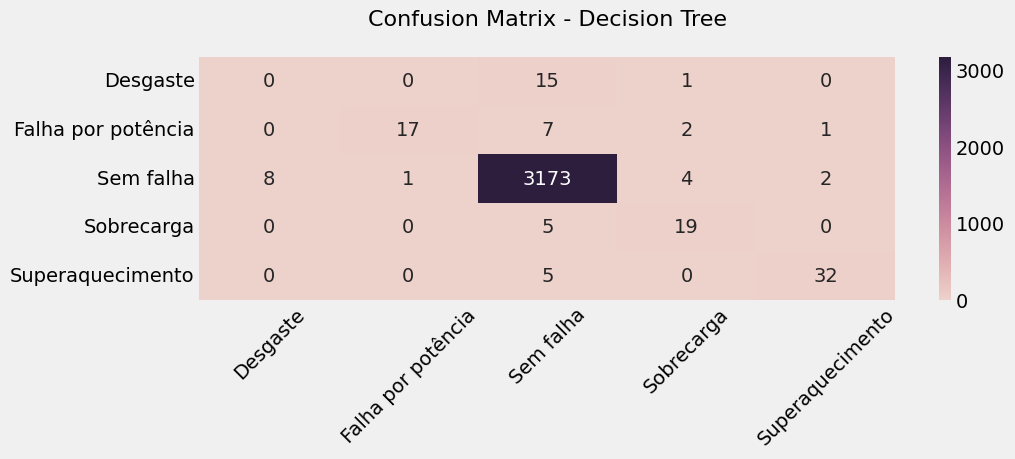

In [ ]:
# plotando o gráfico da matriz de confusão do modelo
sns.heatmap(
    data=cm_decTree, 
    annot=True,
    fmt='.0f',
    cmap=sns.cubehelix_palette(as_cmap=True), 
    xticklabels=labels,
    yticklabels=labels
)

plt.xticks(rotation=45)
plt.title('Confusion Matrix - Decision Tree\n', size=16);

In [ ]:
# instanciando o modelo de floresta aleatória
randFor_model = RandomForestClassifier(
    n_estimators=150, 
    n_jobs=-1,
    random_state=1522,
    class_weight='balanced'
)

randFor_model

RandomForestClassifier(class_weight='balanced', n_estimators=150, n_jobs=-1,
                       random_state=1522)

In [ ]:
# treinando o modelo
randFor_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=150, n_jobs=-1,
                       random_state=1522)

In [ ]:
# com os dados de teste realizando as predições com o modelo após seu treinamento
y_pred_randFor = randFor_model.predict(X_test)

y_pred_randFor

array(['Sem falha', 'Sem falha', 'Sem falha', ..., 'Sem falha',
       'Sem falha', 'Sem falha'], dtype=object)

In [ ]:
# calculando a distribuição das probabilidades
y_proba_randFor = randFor_model.predict_proba(X_test)

y_proba_randFor

array([[0.        , 0.04666667, 0.74      , 0.2       , 0.01333333],
       [0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ],
       ...,
       [0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ]])

In [ ]:
# visualizando o resultado da pontuação da acurácia do roc
roc_score_randFor = roc_auc_score(
    y_true=y_test,
    y_score=y_proba_randFor,
    multi_class='ovo',
    average='weighted'
)

roc_score_randFor

0.9643108292374474

In [ ]:
# visualizando a matriz de confusão
cm_randFor = confusion_matrix(
    y_true=y_test,
    y_pred=y_pred_randFor
)

cm_randFor

array([[   0,    0,   15,    1,    0],
       [   0,   12,   13,    1,    1],
       [   0,    0, 3188,    0,    0],
       [   0,    0,   10,   14,    0],
       [   0,    0,    1,    0,   36]])

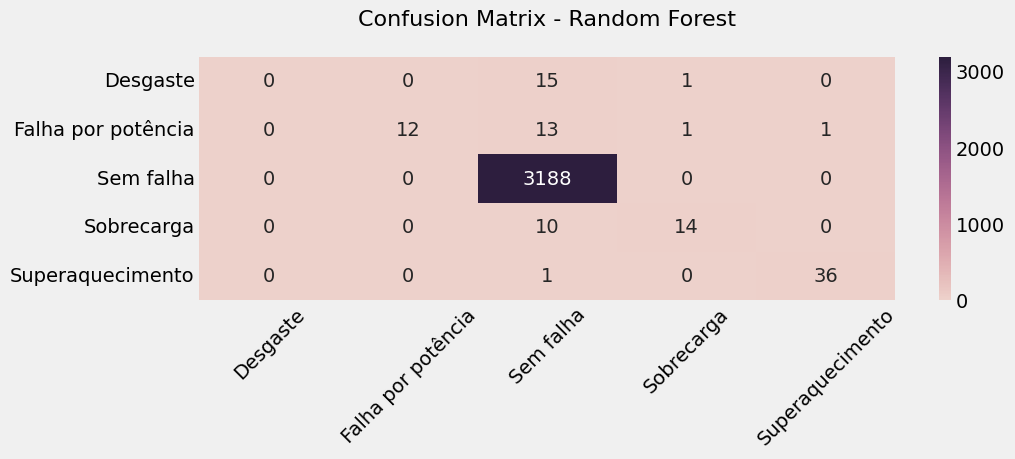

In [ ]:
# plotando o gráfico da matriz de confusão do modelo
sns.heatmap(
    data=cm_randFor, 
    annot=True,
    fmt='.0f',
    cmap=sns.cubehelix_palette(as_cmap=True), 
    xticklabels=labels,
    yticklabels=labels
)

plt.xticks(rotation=45)
plt.title('Confusion Matrix - Random Forest\n', size=16);

In [ ]:
# instanciando o modelo de k-vizinhos
knn_model = KNeighborsClassifier(
    n_neighbors=5,
    n_jobs=-1
)

knn_model

KNeighborsClassifier(n_jobs=-1)

In [ ]:
# treinando o modelo
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [ ]:
# com os dados de teste realizando as predições com o modelo após seu treinamento
y_pred_knn = knn_model.predict(X_test)

y_pred_knn

array(['Sem falha', 'Sem falha', 'Sem falha', ..., 'Sem falha',
       'Sem falha', 'Sem falha'], dtype=object)

In [ ]:
# calculando a distribuição das probabilidades
y_proba_knn = knn_model.predict_proba(X_test)

y_proba_knn

array([[0. , 0. , 0.6, 0.4, 0. ],
       [0. , 0. , 1. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. ],
       ...,
       [0. , 0. , 1. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. ]])

In [ ]:
# visualizando o resultado da pontuação da acurácia do roc
roc_score_knn = roc_auc_score(
    y_true=y_test,
    y_score=y_proba_knn,
    multi_class='ovo',
    average='weighted'
)

roc_score_knn

0.7648615314165327

In [ ]:
# visualizando a matriz de confusão
cm_knn = confusion_matrix(
    y_true=y_test,
    y_pred=y_pred_knn
)

cm_knn

array([[   0,    0,   15,    1,    0],
       [   0,    7,   18,    2,    0],
       [   0,    5, 3178,    3,    2],
       [   0,    0,   16,    6,    2],
       [   0,    0,   37,    0,    0]])

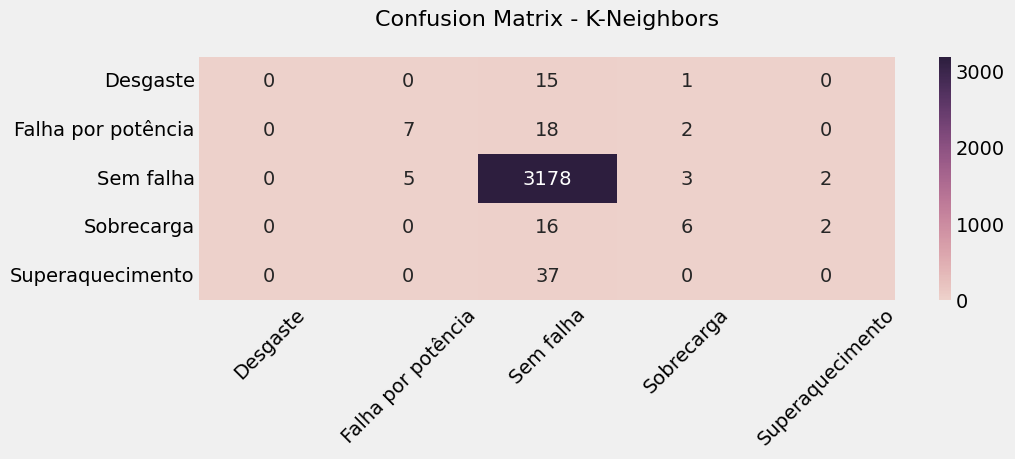

In [ ]:
# plotando o gráfico da matriz de confusão do modelo
sns.heatmap(
    data=cm_knn, 
    annot=True,
    fmt='.0f',
    cmap=sns.cubehelix_palette(as_cmap=True), 
    xticklabels=labels,
    yticklabels=labels
)

plt.xticks(rotation=45)
plt.title('Confusion Matrix - K-Neighbors\n', size=16);

In [ ]:
# instanciando o modelo de gaussiano naive bayes
nBayes_model = GaussianNB()

nBayes_model

GaussianNB()

In [ ]:
# treinando o modelo
nBayes_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# com os dados de teste realizando as predições com o modelo após seu treinamento
y_pred_nBayes = nBayes_model.predict(X_test)

y_pred_nBayes

array(['Superaquecimento', 'Sem falha', 'Sem falha', ..., 'Sem falha',
       'Sem falha', 'Falha por potência'], dtype='<U18')

In [ ]:
# calculando a distribuição das probabilidades
y_proba_nBayes = nBayes_model.predict_proba(X_test)

y_proba_nBayes

array([[7.86805075e-003, 3.63257151e-003, 2.38222746e-001,
        3.23693233e-005, 7.50244263e-001],
       [8.38290889e-005, 1.89709111e-003, 9.98019080e-001,
        3.58429187e-012, 9.72249340e-061],
       [3.56693903e-021, 7.18472050e-005, 9.99923630e-001,
        1.67781218e-023, 4.52280878e-006],
       ...,
       [4.70379297e-004, 9.45814066e-004, 9.98583781e-001,
        2.53857246e-008, 7.04706935e-042],
       [7.22271988e-058, 9.66576718e-004, 9.99033423e-001,
        3.00191084e-032, 8.59964337e-046],
       [1.03404827e-010, 9.67827824e-001, 3.21721760e-002,
        3.29110243e-064, 2.16676873e-185]])

In [ ]:
# visualizando o resultado da pontuação da acurácia do roc
roc_score_nBayes = roc_auc_score(
    y_true=y_test,
    y_score=y_proba_nBayes,
    multi_class='ovo',
    average='weighted'
)

roc_score_nBayes

0.9323794256404146

In [ ]:
# visualizando a matriz de confusão
cm_nBayes = confusion_matrix(
    y_true=y_test,
    y_pred=y_pred_nBayes
)

cm_nBayes

array([[   0,    1,   15,    0,    0],
       [   0,   11,   12,    2,    2],
       [   2,   38, 3068,   45,   35],
       [   0,    0,    0,   23,    1],
       [   0,    0,    4,    0,   33]])

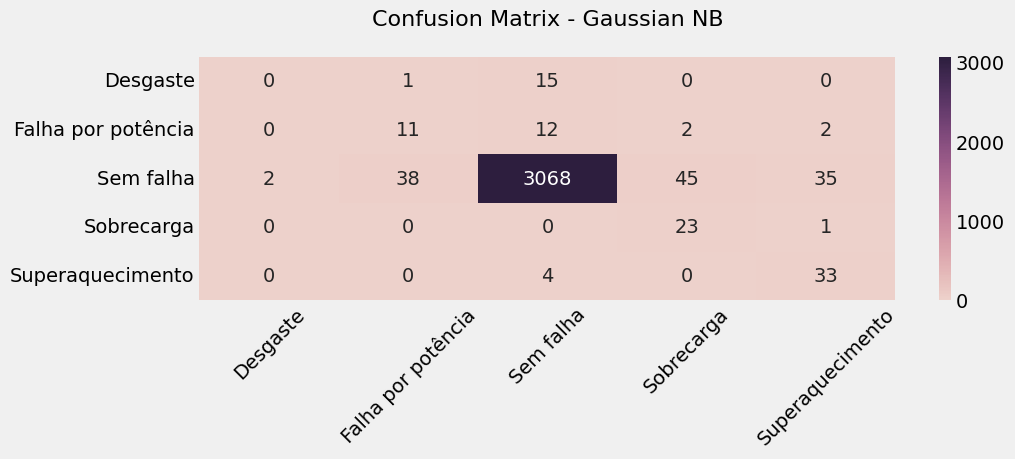

In [ ]:
# plotando o gráfico da matriz de confusão do modelo
sns.heatmap(
    data=cm_nBayes, 
    annot=True,
    fmt='.0f',
    cmap=sns.cubehelix_palette(as_cmap=True), 
    xticklabels=labels,
    yticklabels=labels
)

plt.xticks(rotation=45)
plt.title('Confusion Matrix - Gaussian NB\n', size=16);

In [ ]:
# visualizando o resultado dos modelos
print(
    '\tACCURACY - Test set',
    '=' * 35, 
    f'[LOGISTIC REGRESSION]: {(roc_score_logReg) * 100:.2f}%',
    f'[DECISION TREE]------: {(roc_score_decTree) * 100:.2f}%', 
    f'[RANDOM FOREST]------: {(roc_score_randFor) * 100:.2f}%', 
    f'[K-NEIGHBORS]--------: {(roc_score_knn) * 100:.2f}%',
    f'[NAIVE BAYES]--------: {(roc_score_nBayes) * 100:.2f}%',
    sep='\n'
)

	ACCURACY - Test set
[LOGISTIC REGRESSION]: 96.07%
[DECISION TREE]------: 79.54%
[RANDOM FOREST]------: 96.43%
[K-NEIGHBORS]--------: 76.49%
[NAIVE BAYES]--------: 93.24%


In [ ]:
# importando biblioteca para salvar o modelo final
import pickle

In [ ]:
# instanciando um nome para o modelo final
filename = 'model_final.sav'

In [ ]:
# gravando o modelo floresta aleatória no arquivo
pickle.dump(randFor_model, open(filename, 'wb'))

In [ ]:
# listando as pastas/arquivos presente no diretório
%ls

model_final.sav  sample_data/  test.csv  train.csv


In [ ]:
# visualizando as variáveis do ambiente
%whos

Variable                 Type                      Data/Info
------------------------------------------------------------
DecisionTreeClassifier   ABCMeta                   <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
GaussianNB               ABCMeta                   <class 'sklearn.naive_bayes.GaussianNB'>
KNeighborsClassifier     ABCMeta                   <class 'sklearn.neighbors<...>on.KNeighborsClassifier'>
LogisticRegression       type                      <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
RandomForestClassifier   ABCMeta                   <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
X_test                   DataFrame                       Temperatura ar [K] <...>\n[3292 rows x 9 columns]
X_train                  DataFrame                       Temperatura ar [K] <...>\n[6681 rows x 9 columns]
ax                       tuple                     n=3
cm_decTree               ndarray                   5x5: 25 elems, type `int64`, 200 bytes

In [ ]:
# listando as variáveis do ambiente
%who_ls

['DecisionTreeClassifier',
 'GaussianNB',
 'KNeighborsClassifier',
 'LogisticRegression',
 'RandomForestClassifier',
 'X_test',
 'X_train',
 'ax',
 'cm_decTree',
 'cm_knn',
 'cm_logReg',
 'cm_nBayes',
 'cm_randFor',
 'cols_drop',
 'confusion_matrix',
 'correlation',
 'decTree_model',
 'df',
 'df_eda',
 'df_temp',
 'df_temp_noFail',
 'df_temp_yesFail',
 'df_test',
 'df_train',
 'dummy_train',
 'failures',
 'filename',
 'knn_model',
 'labels',
 'logReg_model',
 'nBayes_model',
 'no_fail',
 'np',
 'pd',
 'pickle',
 'pipeline',
 'plt',
 'quality_failure',
 'randFor_model',
 'rcParams',
 'roc_auc_score',
 'roc_score_decTree',
 'roc_score_knn',
 'roc_score_logReg',
 'roc_score_nBayes',
 'roc_score_randFor',
 'sns',
 'type_faults',
 'warnings',
 'y_pred_decTree',
 'y_pred_knn',
 'y_pred_logReg',
 'y_pred_nBayes',
 'y_pred_randFor',
 'y_proba_decTree',
 'y_proba_knn',
 'y_proba_logReg',
 'y_proba_nBayes',
 'y_proba_randFor',
 'y_test',
 'y_train',
 'yes_fail']